In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive

/content/drive/My Drive


**Generative Adversarial Networks (GAN)**

Implementation of a standard GAN using a Multi-layer Perceptron for both the discriminator and generator.

In [3]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader


if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

In [4]:
#Settings and Dataset
##########################
### SETTINGS
##########################

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Hyperparameters
random_seed = 123
generator_learning_rate = 0.001
discriminator_learning_rate = 0.001
num_epochs = 100
batch_size = 128
LATENT_DIM = 100
IMG_SHAPE = (1, 28, 28)
IMG_SIZE = 1
for x in IMG_SHAPE:
    IMG_SIZE *= x



##########################
### MNIST DATASET
##########################

# Note transforms.ToTensor() scales input images
# to 0-1 range
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         shuffle=False)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


In [5]:
for batch_idx, (features, targets) in enumerate(train_loader):
  print(features.shape)
  print(targets)
  break

torch.Size([128, 1, 28, 28])
tensor([0, 4, 9, 8, 4, 9, 1, 9, 7, 5, 9, 4, 7, 4, 1, 8, 8, 9, 4, 7, 2, 7, 2, 4,
        8, 2, 5, 7, 1, 4, 7, 0, 8, 3, 6, 3, 3, 0, 7, 6, 4, 9, 5, 2, 6, 3, 0, 8,
        9, 8, 3, 9, 7, 1, 6, 4, 2, 2, 4, 4, 5, 6, 8, 4, 2, 9, 8, 9, 3, 2, 0, 0,
        5, 8, 2, 8, 0, 0, 7, 8, 3, 9, 5, 9, 8, 6, 0, 0, 1, 3, 4, 6, 7, 0, 0, 4,
        2, 5, 9, 8, 5, 2, 9, 0, 9, 1, 9, 5, 3, 7, 6, 4, 1, 2, 4, 0, 2, 2, 1, 6,
        1, 3, 0, 9, 3, 6, 4, 3])


In [6]:
print(targets.size(0))

128


In [7]:
z = torch.zeros((targets.size(0), LATENT_DIM)).uniform_(-1.0, 1.0).to(device)

In [8]:
z.shape

torch.Size([128, 100])

In [9]:
generator = nn.Sequential(
            nn.Linear(LATENT_DIM, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, IMG_SIZE),
            nn.Tanh()
        )
generator.to(device)
Gnet=generator(z)
print(Gnet.shape)


torch.Size([128, 784])


In [10]:
discriminator = nn.Sequential(
            nn.Linear(IMG_SIZE, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
discriminator=discriminator.to(device)
dd=discriminator(Gnet)
print(dd.shape)


torch.Size([128, 1])


In [11]:
IMG_SHAPE = (1, 28, 28)
IMG_SIZE = 1
for x in IMG_SHAPE:
    IMG_SIZE *= x

In [12]:
IMG_SIZE

784

In [13]:
IMG_SIZE
Lin1=nn.Linear(3,128)
print(Lin1)
in1=torch.rand(15,3)
out=Lin1(in1)
print(out.shape)


Linear(in_features=3, out_features=128, bias=True)
torch.Size([15, 128])


In [14]:
##########################
### MODEL
##########################


class GAN(torch.nn.Module):

    def __init__(self):
        super(GAN, self).__init__()
        
        
        self.generator = nn.Sequential(
            nn.Linear(LATENT_DIM, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, IMG_SIZE),
            nn.Tanh()
        )
        
        self.discriminator = nn.Sequential(
            nn.Linear(IMG_SIZE, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

            
    def generator_forward(self, z):
        img = self.generator(z)
        return img
    
    def discriminator_forward(self, img):
        pred = model.discriminator(img)
        return pred.view(-1)

In [15]:
# define model and pass to the cuda device
torch.manual_seed(random_seed)

model = GAN()
model = model.to(device)
# optimizer for generator and discrimninator
optim_gener = torch.optim.Adam(model.generator.parameters(), lr=generator_learning_rate)
optim_discr = torch.optim.Adam(model.discriminator.parameters(), lr=discriminator_learning_rate)

In [16]:
# training process
start_time = time.time()    

discr_costs = []
gener_costs = []
for epoch in range(num_epochs):
    model = model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):

        
        
        features = (features - 0.5)*2.
        features = features.view(-1, IMG_SIZE).to(device) 
        targets = targets.to(device)

        valid = torch.ones(targets.size(0)).float().to(device) # valid labels
        fake = torch.zeros(targets.size(0)).float().to(device) # fake labels
        

        ### FORWARD AND BACK PROP
        
        
        # --------------------------
        # Train Generator
        # --------------------------
        
        # Make new images
        z = torch.zeros((targets.size(0), LATENT_DIM)).uniform_(-1.0, 1.0).to(device) # get the latent feature matrix
        generated_features = model.generator_forward(z) # generate features
        
        # Loss for fooling the discriminator
        discr_pred = model.discriminator_forward(generated_features) # pass fake generator features to disriminator network
        
        gener_loss = F.binary_cross_entropy(discr_pred, valid) # compute the loss
        
        optim_gener.zero_grad() # set the gradient zero
        gener_loss.backward()   # compute backward
        optim_gener.step()      # update the gradient
        
        # --------------------------
        # Train Discriminator
        # --------------------------        
        
        discr_pred_real = model.discriminator_forward(features.view(-1, IMG_SIZE)) # real prediction
        real_loss = F.binary_cross_entropy(discr_pred_real, valid) # compute loss on real
        
        discr_pred_fake = model.discriminator_forward(generated_features.detach()) # fake prediction
        fake_loss = F.binary_cross_entropy(discr_pred_fake, fake)  # compute loss on fake
        
        discr_loss = 0.5*(real_loss + fake_loss)  # average the loss of real and fake labels predicitions

        optim_discr.zero_grad() # set gradient zero
        discr_loss.backward()   # compute backward loss
        optim_discr.step()      # optimize the weights
        
        discr_costs.append(discr_loss.item()) # acumlate disc loss
        gener_costs.append(gener_loss.item()) # acumulate gen loss
        
        
        ### LOGGING
        if not batch_idx % 100:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Gen/Dis Loss: %.4f/%.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_loader), gener_loss, discr_loss))

    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/100 | Batch 000/469 | Gen/Dis Loss: 0.6821/0.7102
Epoch: 001/100 | Batch 100/469 | Gen/Dis Loss: 4.3656/0.0455
Epoch: 001/100 | Batch 200/469 | Gen/Dis Loss: 1.4268/0.1459
Epoch: 001/100 | Batch 300/469 | Gen/Dis Loss: 1.7206/0.1577
Epoch: 001/100 | Batch 400/469 | Gen/Dis Loss: 2.2282/0.1306
Time elapsed: 0.11 min
Epoch: 002/100 | Batch 000/469 | Gen/Dis Loss: 1.2843/0.2705
Epoch: 002/100 | Batch 100/469 | Gen/Dis Loss: 0.7821/0.5430
Epoch: 002/100 | Batch 200/469 | Gen/Dis Loss: 0.8501/0.4763
Epoch: 002/100 | Batch 300/469 | Gen/Dis Loss: 0.6614/0.5287
Epoch: 002/100 | Batch 400/469 | Gen/Dis Loss: 1.4604/0.3189
Time elapsed: 0.22 min
Epoch: 003/100 | Batch 000/469 | Gen/Dis Loss: 0.9164/0.4601
Epoch: 003/100 | Batch 100/469 | Gen/Dis Loss: 1.1258/0.3913
Epoch: 003/100 | Batch 200/469 | Gen/Dis Loss: 1.7097/0.2993
Epoch: 003/100 | Batch 300/469 | Gen/Dis Loss: 0.9697/0.4669
Epoch: 003/100 | Batch 400/469 | Gen/Dis Loss: 1.2395/0.3690
Time elapsed: 0.33 min
Epoch: 004/100 |

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

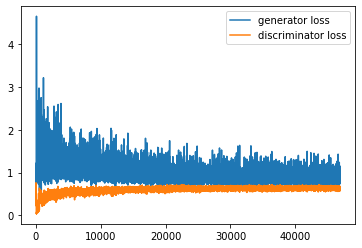

In [18]:
plt.plot(range(len(gener_costs)), gener_costs, label='generator loss')
plt.plot(range(len(discr_costs)), discr_costs, label='discriminator loss')
plt.legend()
plt.show()

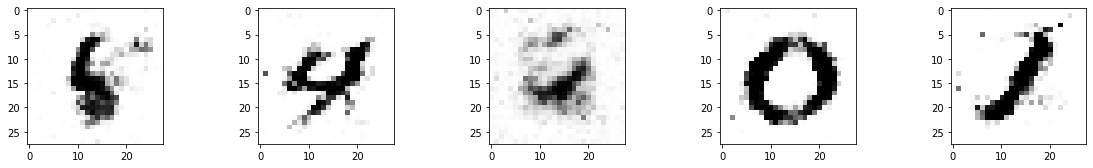

In [19]:
##########################
### VISUALIZATION
##########################


model.eval()
# Make new images
z = torch.zeros((5, LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
generated_features = model.generator_forward(z)
imgs = generated_features.view(-1, 28, 28)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 2.5))


for i, ax in enumerate(axes):
    axes[i].imshow(imgs[i].to(torch.device('cpu')).detach(), cmap='binary')

**Convolutional GAN That Fails**

Imports

In [20]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader


if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

In [21]:
##########################
### SETTINGS
##########################

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Hyperparameters
random_seed = 42
generator_learning_rate = 0.0001
discriminator_learning_rate = 0.0001
num_epochs = 100
BATCH_SIZE = 128
LATENT_DIM = 100
IMG_SHAPE = (1, 28, 28)
IMG_SIZE = 1
for x in IMG_SHAPE:
    IMG_SIZE *= x



##########################
### MNIST DATASET
##########################

# Note transforms.ToTensor() scales input images
# to 0-1 range
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE,
                          num_workers=4,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE,
                         num_workers=4,
                         shuffle=False)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


In [22]:
##########################
### MODEL
##########################

class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    
class Reshape1(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), 64, 7, 7)


class GAN(torch.nn.Module):

    def __init__(self):
        super(GAN, self).__init__()
        
        
        self.generator = nn.Sequential(
              
            nn.Linear(LATENT_DIM, 3136),  # 7x7x64=3136
            nn.LeakyReLU(inplace=True),
            Reshape1(),  # reshape 3136 into 7x7x64
            
            nn.ConvTranspose2d(in_channels=64, out_channels=64, kernel_size=(2, 2), stride=(2, 2), padding=0),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=32, padding=1, kernel_size=(2, 2)),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(inplace=True),    
            
            nn.ConvTranspose2d(in_channels=32, out_channels=32, kernel_size=(2, 2), stride=(2, 2), padding=0),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=16, padding=1, kernel_size=(2, 2)),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(inplace=True),      
            
            nn.Conv2d(in_channels=16, out_channels=8, padding=1, kernel_size=(3, 3)),
            nn.BatchNorm2d(8),
            nn.LeakyReLU(inplace=True),    
            
            nn.Conv2d(in_channels=8, out_channels=4, padding=0, kernel_size=(3, 3)),
            nn.BatchNorm2d(4),
            nn.LeakyReLU(inplace=True),    
            
            nn.Conv2d(in_channels=4, out_channels=1, padding=0, kernel_size=(2, 2)),
            nn.Tanh()
        )
        
        self.discriminator = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, padding=1, kernel_size=(3, 3)),
            nn.BatchNorm2d(8),
            nn.LeakyReLU(inplace=True), 
            nn.Conv2d(in_channels=8, out_channels=8, padding=1, stride=2, kernel_size=(3, 3)),
            nn.BatchNorm2d(8),
            nn.LeakyReLU(inplace=True),
            
            
            nn.Conv2d(in_channels=8, out_channels=16, padding=1, kernel_size=(3, 3)),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=16, out_channels=16, padding=1, stride=2, kernel_size=(3, 3)),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(inplace=True),
            
            nn.Conv2d(in_channels=16, out_channels=32, padding=1, kernel_size=(3, 3)),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=32, padding=1, stride=2, kernel_size=(3, 3)),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(inplace=True),
            
            nn.AdaptiveAvgPool2d(1),
            Flatten(),
            nn.Linear(32, 16),
            nn.LeakyReLU(inplace=True),
            nn.BatchNorm1d(16),
            
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

            
    def generator_forward(self, z):
        img = self.generator(z)
        return img
    
    def discriminator_forward(self, img):
        pred = model.discriminator(img)
        return pred.view(-1)

In [23]:
torch.manual_seed(random_seed)

#del model
model = GAN()
model = model.to(device)

print(model)

GAN(
  (generator): Sequential(
    (0): Linear(in_features=100, out_features=3136, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Reshape1()
    (3): ConvTranspose2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Conv2d(64, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.01, inplace=True)
    (9): ConvTranspose2d(32, 32, kernel_size=(2, 2), stride=(2, 2))
    (10): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.01, inplace=True)
    (12): Conv2d(32, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): LeakyReLU(neg

In [24]:
optim_gener = torch.optim.Adam(model.generator.parameters(), lr=generator_learning_rate)
optim_discr = torch.optim.Adam(model.discriminator.parameters(), lr=discriminator_learning_rate)

In [25]:
start_time = time.time()    

discr_costs = []
gener_costs = []
for epoch in range(num_epochs):
    model = model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):

        
        # Normalize images to [-1, 1] range
        features = (features - 0.5)*2.
        features = features.view(-1, IMG_SIZE).to(device) 

        targets = targets.to(device)

        valid = torch.ones(targets.size(0)).float().to(device)
        fake = torch.zeros(targets.size(0)).float().to(device)
        

        ### FORWARD AND BACK PROP
        
        
        # --------------------------
        # Train Generator
        # --------------------------
        
        # Make new images
        z = torch.zeros((targets.size(0), LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
        generated_features = model.generator_forward(z)
        
        # Loss for fooling the discriminator
        discr_pred = model.discriminator_forward(generated_features.view(targets.size(0), 1, 28, 28))
        
        gener_loss = F.binary_cross_entropy(discr_pred, valid)
        
        optim_gener.zero_grad()
        gener_loss.backward()
        optim_gener.step()
        
        # --------------------------
        # Train Discriminator
        # --------------------------        
        
        discr_pred_real = model.discriminator_forward(features.view(targets.size(0), 1, 28, 28))
        real_loss = F.binary_cross_entropy(discr_pred_real, valid)
        
        discr_pred_fake = model.discriminator_forward(generated_features.view(targets.size(0), 1, 28, 28).detach())
        fake_loss = F.binary_cross_entropy(discr_pred_fake, fake)
        
        discr_loss = 0.5*(real_loss + fake_loss)

        optim_discr.zero_grad()
        discr_loss.backward()
        optim_discr.step()        
        
        discr_costs.append(discr_loss.item())
        gener_costs.append(gener_loss.item())
        
        
        ### LOGGING
        if not batch_idx % 100:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Gen/Dis Loss: %.4f/%.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_loader), gener_loss, discr_loss))

    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/100 | Batch 000/469 | Gen/Dis Loss: 0.6627/0.7376
Epoch: 001/100 | Batch 100/469 | Gen/Dis Loss: 0.6414/0.7004
Epoch: 001/100 | Batch 200/469 | Gen/Dis Loss: 0.6518/0.6972
Epoch: 001/100 | Batch 300/469 | Gen/Dis Loss: 0.6625/0.6962
Epoch: 001/100 | Batch 400/469 | Gen/Dis Loss: 0.6705/0.6950
Time elapsed: 0.26 min
Epoch: 002/100 | Batch 000/469 | Gen/Dis Loss: 0.6756/0.6944
Epoch: 002/100 | Batch 100/469 | Gen/Dis Loss: 0.6815/0.6941
Epoch: 002/100 | Batch 200/469 | Gen/Dis Loss: 0.6861/0.6940
Epoch: 002/100 | Batch 300/469 | Gen/Dis Loss: 0.6890/0.6936
Epoch: 002/100 | Batch 400/469 | Gen/Dis Loss: 0.6909/0.6936
Time elapsed: 0.52 min
Epoch: 003/100 | Batch 000/469 | Gen/Dis Loss: 0.6917/0.6935
Epoch: 003/100 | Batch 100/469 | Gen/Dis Loss: 0.6926/0.6935
Epoch: 003/100 | Batch 200/469 | Gen/Dis Loss: 0.6929/0.6935
Epoch: 003/100 | Batch 300/469 | Gen/Dis Loss: 0.6932/0.6934
Epoch: 003/100 | Batch 400/469 | Gen/Dis Loss: 0.6933/0.6934
Time elapsed: 0.78 min
Epoch: 004/100 |

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

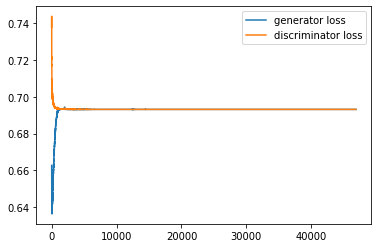

In [27]:
plt.plot(range(len(gener_costs)), gener_costs, label='generator loss')
plt.plot(range(len(discr_costs)), discr_costs, label='discriminator loss')
plt.legend()
plt.show()

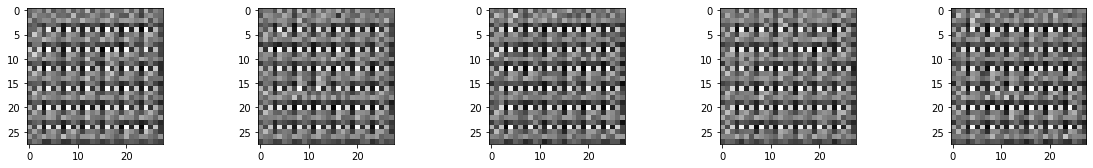

In [28]:
##########################
### VISUALIZATION
##########################


model.eval()
# Make new images
z = torch.zeros((5, LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
generated_features = model.generator_forward(z)
imgs = generated_features.view(-1, 28, 28)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 2.5))


for i, ax in enumerate(axes):
    axes[i].imshow(imgs[i].to(torch.device('cpu')).detach(), cmap='binary')

**Generative Adversarial Networks (GAN)AN)**

A GAN with mode collapse.

In [29]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
from torch.utils.data import DataLoader


if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

In [30]:
##########################
### SETTINGS
##########################

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Hyperparameters
random_seed = 0
generator_learning_rate = 0.001
discriminator_learning_rate = 0.001
num_epochs = 100
BATCH_SIZE = 128
LATENT_DIM = 100
IMG_SHAPE = (1, 28, 28)
IMG_SIZE = 1
for x in IMG_SHAPE:
    IMG_SIZE *= x



##########################
### MNIST DATASET
##########################

# Note transforms.ToTensor() scales input images
# to 0-1 range
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())


train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE,
                          num_workers=4,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE,
                         num_workers=4,
                         shuffle=False)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([128, 1, 28, 28])
Image label dimensions: torch.Size([128])


In [31]:
##########################
### MODEL
##########################

class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)


class GAN(torch.nn.Module):

    def __init__(self):
        super(GAN, self).__init__()
        
        
        self.generator = nn.Sequential(
            nn.Linear(LATENT_DIM, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, IMG_SIZE),
            nn.Tanh()
        )
        
        self.discriminator = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, padding=1, kernel_size=(3, 3)),
            nn.LeakyReLU(inplace=True), 
            nn.Conv2d(in_channels=8, out_channels=8, padding=1, stride=2, kernel_size=(3, 3)),
            nn.LeakyReLU(inplace=True),
            
            
            nn.Conv2d(in_channels=8, out_channels=16, padding=1, kernel_size=(3, 3)),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=16, out_channels=16, padding=1, stride=2, kernel_size=(3, 3)),
            nn.LeakyReLU(inplace=True),
            
            nn.Conv2d(in_channels=16, out_channels=32, padding=1, kernel_size=(3, 3)),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=32, padding=1, stride=2, kernel_size=(3, 3)),
            nn.LeakyReLU(inplace=True),
            
            nn.AdaptiveAvgPool2d(1),
            Flatten(),
            nn.Linear(32, 16),
            nn.LeakyReLU(inplace=True),
            
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

            
    def generator_forward(self, z):
        img = self.generator(z)
        return img
    
    def discriminator_forward(self, img):
        pred = model.discriminator(img)
        return pred.view(-1)

In [32]:
torch.manual_seed(random_seed)

#del model
model = GAN()
model = model.to(device)

print(model)

GAN(
  (generator): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=784, bias=True)
    (4): Tanh()
  )
  (discriminator): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01, inplace=True)
    (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01, inplace=True)
    (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): LeakyReLU(negative_slope=0.01, inplace=True)
    (8): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): LeakyReLU(negative_slope=0.01, inplace=True)
    (10): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), 

In [33]:
optim_gener = torch.optim.Adam(model.generator.parameters(), lr=generator_learning_rate)
optim_discr = torch.optim.Adam(model.discriminator.parameters(), lr=discriminator_learning_rate)

In [34]:
start_time = time.time()    

discr_costs = []
gener_costs = []
for epoch in range(num_epochs):
    model = model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):

        
        # Normalize images to [-1, 1] range
        features = (features - 0.5)*2.
        features = features.view(-1, IMG_SIZE).to(device) 

        targets = targets.to(device)

        valid = torch.ones(targets.size(0)).float().to(device)
        fake = torch.zeros(targets.size(0)).float().to(device)
        

        ### FORWARD AND BACK PROP
        
        
        # --------------------------
        # Train Generator
        # --------------------------
        
        # Make new images
        z = torch.zeros((targets.size(0), LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
        generated_features = model.generator_forward(z)
        
        # Loss for fooling the discriminator
        discr_pred = model.discriminator_forward(generated_features.view(targets.size(0), 1, 28, 28))
        
        gener_loss = F.binary_cross_entropy(discr_pred, valid)
        
        optim_gener.zero_grad()
        gener_loss.backward()
        optim_gener.step()
        
        # --------------------------
        # Train Discriminator
        # --------------------------        
        
        discr_pred_real = model.discriminator_forward(features.view(targets.size(0), 1, 28, 28))
        real_loss = F.binary_cross_entropy(discr_pred_real, valid)
        
        discr_pred_fake = model.discriminator_forward(generated_features.view(targets.size(0), 1, 28, 28).detach())
        fake_loss = F.binary_cross_entropy(discr_pred_fake, fake)
        
        discr_loss = 0.5*(real_loss + fake_loss)

        optim_discr.zero_grad()
        discr_loss.backward()
        optim_discr.step()        
        
        discr_costs.append(discr_loss)
        gener_costs.append(gener_loss)
        
        
        ### LOGGING
        if not batch_idx % 100:
            print ('Epoch: %03d/%03d | Batch %03d/%03d | Gen/Dis Loss: %.4f/%.4f' 
                   %(epoch+1, num_epochs, batch_idx, 
                     len(train_loader), gener_loss, discr_loss))

    print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))
    
print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

Epoch: 001/100 | Batch 000/469 | Gen/Dis Loss: 0.8191/0.7002
Epoch: 001/100 | Batch 100/469 | Gen/Dis Loss: 11.1816/0.0004
Epoch: 001/100 | Batch 200/469 | Gen/Dis Loss: 10.4408/0.0000
Epoch: 001/100 | Batch 300/469 | Gen/Dis Loss: 10.7570/0.0000
Epoch: 001/100 | Batch 400/469 | Gen/Dis Loss: 11.0853/0.0000
Time elapsed: 0.17 min
Epoch: 002/100 | Batch 000/469 | Gen/Dis Loss: 11.2968/0.0000
Epoch: 002/100 | Batch 100/469 | Gen/Dis Loss: 11.5957/0.0000
Epoch: 002/100 | Batch 200/469 | Gen/Dis Loss: 11.8913/0.0000
Epoch: 002/100 | Batch 300/469 | Gen/Dis Loss: 12.1452/0.0000
Epoch: 002/100 | Batch 400/469 | Gen/Dis Loss: 12.3829/0.0000
Time elapsed: 0.34 min
Epoch: 003/100 | Batch 000/469 | Gen/Dis Loss: 12.5437/0.0000
Epoch: 003/100 | Batch 100/469 | Gen/Dis Loss: 12.7481/0.0000
Epoch: 003/100 | Batch 200/469 | Gen/Dis Loss: 12.9408/0.0000
Epoch: 003/100 | Batch 300/469 | Gen/Dis Loss: 13.1151/0.0000
Epoch: 003/100 | Batch 400/469 | Gen/Dis Loss: 13.2280/0.0000
Time elapsed: 0.51 min
Ep

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

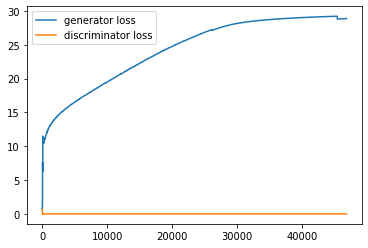

In [36]:
plt.plot(range(len(gener_costs)), gener_costs, label='generator loss')
plt.plot(range(len(discr_costs)), discr_costs, label='discriminator loss')
plt.legend()
plt.show()

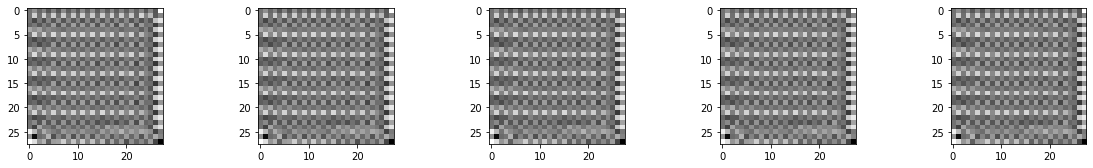

In [37]:
##########################
### VISUALIZATION
##########################


model.eval()
# Make new images
z = torch.zeros((5, LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
generated_features = model.generator_forward(z)
imgs = generated_features.view(-1, 28, 28)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 2.5))


for i, ax in enumerate(axes):
    axes[i].imshow(imgs[i].to(torch.device('cpu')).detach(), cmap='binary')

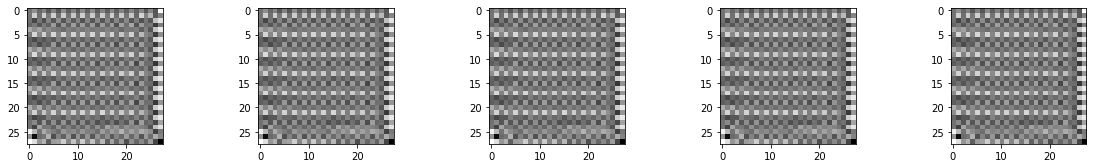

In [38]:
##########################
### VISUALIZATION
##########################


model.eval()
# Make new images
z = torch.zeros((5, LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
generated_features = model.generator_forward(z)
imgs = generated_features.view(-1, 28, 28)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 2.5))


for i, ax in enumerate(axes):
    axes[i].imshow(imgs[i].to(torch.device('cpu')).detach(), cmap='binary')

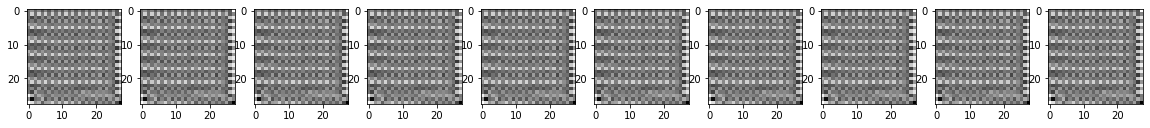

In [39]:
##########################
### VISUALIZATION
##########################


model.eval()
# Make new images
z = torch.zeros((10, LATENT_DIM)).uniform_(-1.0, 1.0).to(device)
generated_features = model.generator_forward(z)
imgs = generated_features.view(-1, 28, 28)

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 2.5))


for i, ax in enumerate(axes):
    axes[i].imshow(imgs[i].to(torch.device('cpu')).detach(), cmap='binary')